# TODO:

- store output of state vars in xarray-simlab data structure
    1. for gekko solver
    2. for odeint solver
    3. for step-wise solver
    
this needs to be completely wrapped in the backend..
i need to somehow combine the "core.parts" so that they are automatically initialized with the xs.Model

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import xsimlab as xs

# to measure process time
import time as tm

In [ ]:
from xsimlab.monitoring import ProgressBar

In [ ]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra

In [3]:
from phydra.processes.main import ModelCore, Solver

from phydra.utility.xsimlabwrappers import phydra_setup

In [4]:
Model = xs.Model({'core':ModelCore, 'solver':Solver})

In [5]:
Model

<xsimlab.Model (2 processes, 2 inputs)>
core
    solver_type     [in]
    y_init          [in]
solver

In [27]:
modelsetup = phydra_setup(Model,
            input_vars={
                'core__solver_type':'odeint',
                'core__y_init':0.5
            },
            output_vars={
                'core__y':None,
            })

In [40]:
modelsetup = xs.create_setup(Model,
                             
            clocks={'time': np.arange(0,20,0.001)},
            input_vars={
                'core__solver_type':'stepwise',
                'core__y_init':0.5
            },
            output_vars={
                'core__y':None,
            })

In [41]:
with ProgressBar(frontend="console"):
        out_ds = modelsetup.xsimlab.run(model=Model)

             1% | run step 169/19999 

initializing model core
SV_SETUP y
assembling model
STEPWISE Model Assembly
defaultdict(None, {'k': Parameter(name='k', value=0.5)})
parameters {'k': 0.5}
fluxes {'y': [<function ModelCore.initialize.<locals>.linear_loss at 0x11ec74940>]}


██████████ 100% | Simulation finished in 00:24 


finalizing: cleanup


In [42]:
out_ds

<xarray.Dataset>
Dimensions:            (time: 20000)
Coordinates:
  * time               (time) float64 0.0 0.001 0.002 0.003 ... 20.0 20.0 20.0
Data variables:
    core__solver_type  <U8 'stepwise'
    core__y            (time) float64 0.5 0.4998 0.4995 ... 2.267e-05 2.265e-05
    core__y_init       float64 0.5

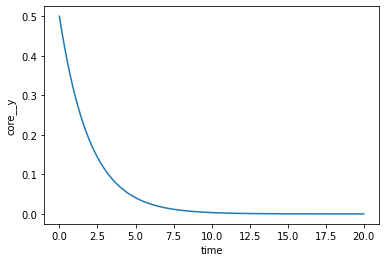

In [43]:
out_ds.core__y.plot()